In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pyarrow
!pip install fastparquet

In [3]:
meli = pd.read_parquet("train_data.parquet")

In [4]:
meli.head()

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,"1,440.00"


In [5]:
cantidad_vendida_por_sku = meli[["sku","sold_quantity"]]

In [6]:
cantidad_vendida_por_sku = cantidad_vendida_por_sku.groupby("sku").sum()

In [7]:
cantidad_vendida_por_sku = cantidad_vendida_por_sku.reset_index()

In [8]:
cantidad_vendida_por_sku.max()

sku              660915
sold_quantity    137528
dtype: int64

In [9]:
#El producto mas vendido en el lapso de esos 2 meses de datos
cantidad_vendida_por_sku[cantidad_vendida_por_sku["sold_quantity"]==137528]

,sku,sold_quantity
526920,526920,137528


In [10]:
best_seller = meli[meli["sku"]==526920]

In [11]:
best_seller.head(50)

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
28121028,526920,2021-02-01,3644,75.24,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121029,526920,2021-02-02,4520,79.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121030,526920,2021-02-03,3031,79.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121031,526920,2021-02-04,2889,79.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121032,526920,2021-02-05,2414,79.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121033,526920,2021-02-06,2579,75.05,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121034,526920,2021-02-07,1895,75.05,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121035,526920,2021-02-08,2982,75.05,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121036,526920,2021-02-09,2778,75.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"
28121037,526920,2021-02-10,3239,69.00,MEX,classic,fulfillment,paid_shipping,"1,440.00"


In [12]:
best_seller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 28121028 to 28121086
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sku                     59 non-null     int64  
 1   date                    59 non-null     object 
 2   sold_quantity           59 non-null     int64  
 3   current_price           59 non-null     float64
 4   currency                59 non-null     object 
 5   listing_type            59 non-null     object 
 6   shipping_logistic_type  59 non-null     object 
 7   shipping_payment        59 non-null     object 
 8   minutes_active          59 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 4.6+ KB


In [13]:
best_seller = best_seller[["date","sold_quantity"]]

In [14]:
best_seller["date"] = pd.to_datetime(best_seller["date"])

In [15]:
best_seller["date"] = best_seller["date"].apply(lambda x: x.day_name())

In [16]:
best_seller = best_seller.reset_index()

In [17]:
best_seller.head()

,index,date,sold_quantity
0,28121028,Monday,3644
1,28121029,Tuesday,4520
2,28121030,Wednesday,3031
3,28121031,Thursday,2889
4,28121032,Friday,2414


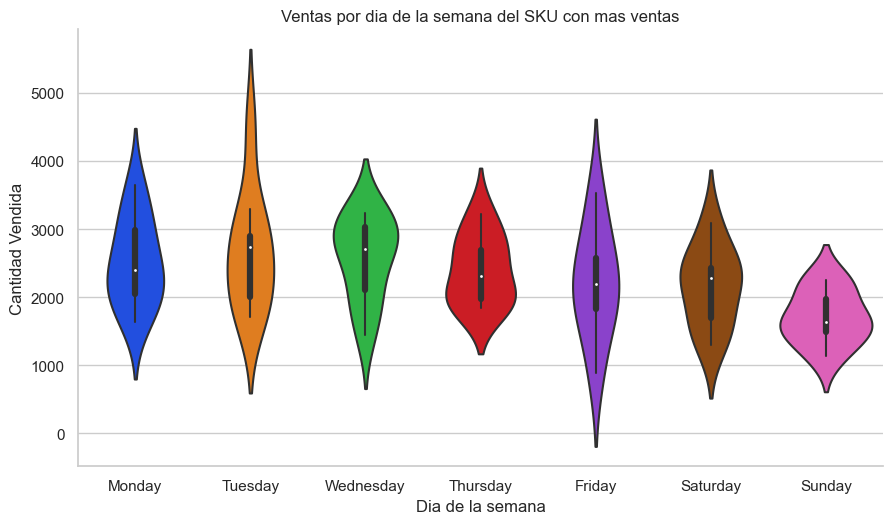

In [18]:
ax = sns.catplot(x = "date",
                 y = "sold_quantity",
                 data = best_seller,
                 kind = "violin",
                 inner = "box",
                 height=5,
                 aspect=16/9,
                 palette="bright")\
                .set(title='Ventas por dia de la semana del SKU con mas ventas',
                    ylabel='Cantidad Vendida',
                    xlabel='Dia de la semana')
                                                                                                         


In [19]:
ventas_por_semana = meli[["date","sold_quantity"]]

In [20]:
ventas_por_semana.head()

,date,sold_quantity
0,2021-02-01,0
1,2021-02-02,0
2,2021-02-03,0
3,2021-02-04,0
4,2021-02-05,1


In [21]:
ventas_por_semana["date"] = pd.to_datetime(ventas_por_semana["date"])

In [22]:
ventas_por_semana["date"] = ventas_por_semana["date"].apply(lambda x: x.week)

In [23]:
ventas_por_semana = ventas_por_semana.rename(columns={'date': 'week'})

In [24]:
ventas_por_semana.head()

,week,sold_quantity
0,5,0
1,5,0
2,5,0
3,5,0
4,5,1


In [25]:
ventas_por_semana = ventas_por_semana.groupby("week").sum().reset_index()

In [26]:
ventas_por_semana["week"] = ventas_por_semana["week"] -4

In [27]:
ventas_por_semana["sold_quantity"] = ventas_por_semana["sold_quantity"]/1000000

In [28]:
ventas_por_semana.head(12)

,week,sold_quantity
0,1,4.30
1,2,4.38
2,3,4.16
3,4,4.30
4,5,4.57
5,6,4.59
6,7,4.52
7,8,4.42
8,9,2.05


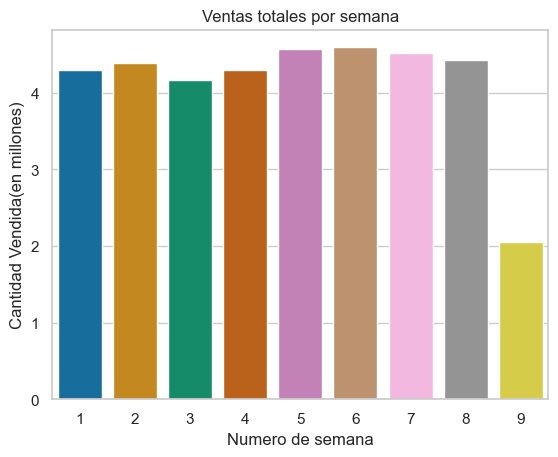

In [29]:
ax = sns.barplot(x = "week",
                 y = "sold_quantity",
                 data = ventas_por_semana,
                 palette="colorblind")\
                .set(title='Ventas totales por semana',
                    ylabel='Cantidad Vendida(en millones)',
                    xlabel='Numero de semana')